<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#toydataでのdemo再現" data-toc-modified-id="toydataでのdemo再現-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>toydataでのdemo再現</a></span><ul class="toc-item"><li><span><a href="#未知データへの対応" data-toc-modified-id="未知データへの対応-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>未知データへの対応</a></span></li></ul></li><li><span><a href="#Irisデータ" data-toc-modified-id="Irisデータ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Irisデータ</a></span><ul class="toc-item"><li><span><a href="#通常のkNNfeat" data-toc-modified-id="通常のkNNfeat-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>通常のkNNfeat</a></span></li><li><span><a href="#Enhanced-kNNfeat" data-toc-modified-id="Enhanced-kNNfeat-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Enhanced kNNfeat</a></span></li></ul></li></ul></div>

In [74]:
import numpy as np
from sklearn.model_selection import KFold

def _distance(a, b):
    return np.linalg.norm(b - a)

def _get_feat(data, X_train, y_train, class_index, k_index):
    inclass_X = X_train[y_train == class_index]
    distances = np.array([_distance(a, data) for a in inclass_X])
    sorted_distances_index = np.argsort(distances)
    nearest_index = list(sorted_distances_index[0: (k_index + 1)])
    dist = np.sum(distances[nearest_index])
    return dist

def knnExtract(X, y, k = 1, holds = 5):
    CLASS_NUM = len(set(y))
    res = np.empty((len(X), CLASS_NUM * k))
    kf = KFold(n_splits = holds,  shuffle = True)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        features = np.empty([0, len(X_test)])
        
        for class_index in range(CLASS_NUM):
            for k_index in range(k):
                feat = np.array([np.apply_along_axis(_get_feat, 1, X_test, X_train, y_train, class_index, k_index)])
                features = np.append(features, feat, axis = 0)
        res[test_index] = features.T      

    return res

## toydataでのdemo再現

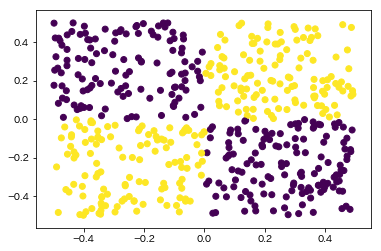

In [75]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x0 = np.random.rand(500) - 0.5
x1 = np.random.rand(500) - 0.5
X = np.array(list(zip(x0, x1)))
y = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])

plt.scatter(X[:,0], X[:,1], c=y)

In [76]:
newX = knnExtract(X, y, k=1, holds = 5)

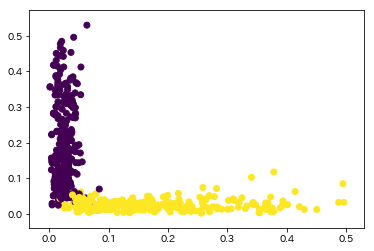

In [77]:
plt.scatter(newX[:,0], newX[:,1], c=y)

### 未知データへの対応

In [60]:
x0 = np.random.rand(500) - 0.5
x1 = np.random.rand(500) - 0.5
X = np.array(list(zip(x0, x1)))
y = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])

x0 = np.random.rand(50) - 0.5
x1 = np.random.rand(50) - 0.5
X_test = np.array(list(zip(x0, x1)))
y_test = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])

In [90]:
def enhanced_knnExtract(X, X_train, y_train, k = 1, holds = 5):
    CLASS_NUM = len(set(y_train))
    res = np.empty((len(X), CLASS_NUM * k))
    kf = KFold(n_splits = holds,  shuffle = True)
        
    for (train_index_trash, test_index), (train_index, test_index_trash)  in zip(kf.split(X), kf.split(X_train)):
        X_trainNN = X_train[train_index]
        y_trainNN = y_train[train_index]
        X_testNN = X[test_index]
        features = np.empty([0, len(X_testNN)])
       
        
        for class_index in range(CLASS_NUM):
            for k_index in range(k):
                feat = np.array([np.apply_along_axis(_get_feat, 1, X_testNN, X_trainNN, y_trainNN, class_index, k_index)])
                features = np.append(features, feat, axis = 0)
        res[test_index] = features.T            

    return res

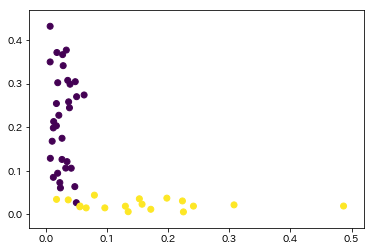

In [92]:
newX = enhanced_knnExtract(X_test, X, y, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y_test)

## Irisデータ

In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
y = iris.target
X = iris.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

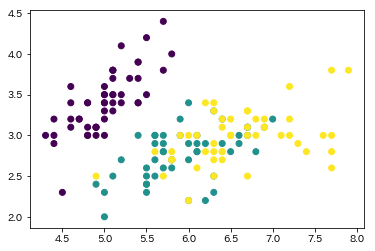

In [98]:
plt.scatter(X[:,0], X[:,1], c=y)

### 通常のkNNfeat

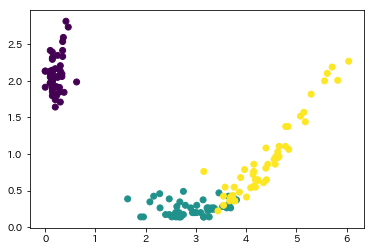

In [99]:
newX = knnExtract(X, y, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y)

### Enhanced kNNfeat

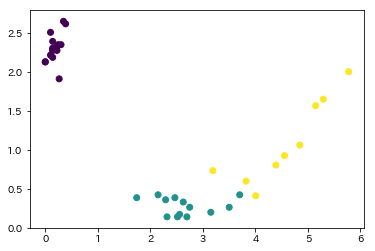

In [100]:
newX = enhanced_knnExtract(X_test, X_train, y_train, k=1, holds = 5)
plt.scatter(newX[:,0], newX[:,1], c=y_test)